In [1]:
# Automatically reload module
%load_ext autoreload
%autoreload 2

In [3]:
from nlp_analysis.word_wizard import WordWizard
from pipeline_executor import PipelineExecutor
from matplotlib import pyplot as plt

import pandas as pd

In [4]:
def plot_clusters(word_wizard: WordWizard):
    result = pd.DataFrame(word_wizard.df['paragraph_reduced_dimensions_word_embeddings'].tolist(), columns=['x', 'y'])
    result['labels'] = word_wizard.df['paragraph_sentence_embeddings_clusters'].tolist()

    # remove x, y outliers using percentile
    x_min, x_max = result['x'].quantile([0.01, 0.99])
    y_min, y_max = result['y'].quantile([0.01, 0.99])
    result = result[(result['x'] > x_min) & (result['x'] < x_max)]
    result = result[(result['y'] > y_min) & (result['y'] < y_max)]

    # Visualize clusters
    fig, ax = plt.subplots(figsize=(20, 10))
    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]
    plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')

    plt.colorbar()

In [5]:
topic = 'Quantum Computing' # "quantumcomputing"AND"research"

# create a pipeline executor
pipeline_executor = PipelineExecutor()
df = pipeline_executor.execute(query=topic, max_articles=None, overwrite=False)

# print the first 5 rows of the dataframe
df.head(1)

,paragraph_index,engine,link,se_description,se_source,n3k_author,n3k_published,paragraph,title,body
0,0,Google,https://interestingengineering.com/science/a-n...,"In a groundbreaking study, scientists have dem...",Interesting Engineering,['Tejasri Gururaj'],2023-06-11 08:06:58+00:00,Both experiments were conducted at exceedingly...,Splitting phonons or sound for new type of qua...,Both experiments were conducted at exceedingly...


# Approach 1
## Topic Modelling with Embeddings
In this approach, we use the embeddings that we have already created. This approach is faster but might include more stopwords in the topics.

In [6]:
word_wizard = WordWizard(df)
word_wizard.create_sentence_embeddings(column='paragraph')

Batches: 100%|██████████| 321/321 [01:14<00:00,  4.30it/s]


In [7]:
word_wizard.df.shape

(10245, 12)

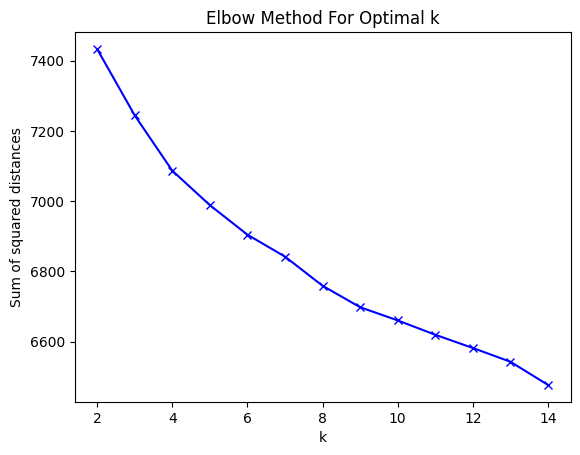

,paragraph_index,engine,link,se_description,se_source,n3k_author,n3k_published,paragraph,title,body,sentences,paragraph_sentence_embeddings,paragraph_sentence_embeddings_clusters,paragraph_sentence_embeddings_clusters_medoids
0,0,Google,https://interestingengineering.com/science/a-n...,"In a groundbreaking study, scientists have dem...",Interesting Engineering,['Tejasri Gururaj'],2023-06-11 08:06:58+00:00,Both experiments were conducted at exceedingly...,Splitting phonons or sound for new type of qua...,Both experiments were conducted at exceedingly...,[Both experiments were conducted at exceedingl...,"[-0.09927327185869217, -0.038048699498176575, ...",0,False


In [8]:
word_wizard.cluster_embeddings(column='paragraph', method='elbow')

word_wizard.df.head(1)

In [9]:
word_wizard.df['paragraph_sentence_embeddings_clusters'].value_counts()

4    1750
7    1568
5    1247
6    1171
3    1141
2    1060
8     902
0     799
1     607
Name: paragraph_sentence_embeddings_clusters, dtype: int64

In [10]:
word_wizard.reduce_demensionality(column='paragraph')
word_wizard.df.head(1)

,paragraph_index,engine,link,se_description,se_source,n3k_author,n3k_published,paragraph,title,body,sentences,paragraph_sentence_embeddings,paragraph_sentence_embeddings_clusters,paragraph_sentence_embeddings_clusters_medoids,paragraph_reduced_dimensions_word_embeddings
0,0,Google,https://interestingengineering.com/science/a-n...,"In a groundbreaking study, scientists have dem...",Interesting Engineering,['Tejasri Gururaj'],2023-06-11 08:06:58+00:00,Both experiments were conducted at exceedingly...,Splitting phonons or sound for new type of qua...,Both experiments were conducted at exceedingly...,[Both experiments were conducted at exceedingl...,"[-0.09927327185869217, -0.038048699498176575, ...",0,False,"[14.016467094421387, 10.329602241516113]"


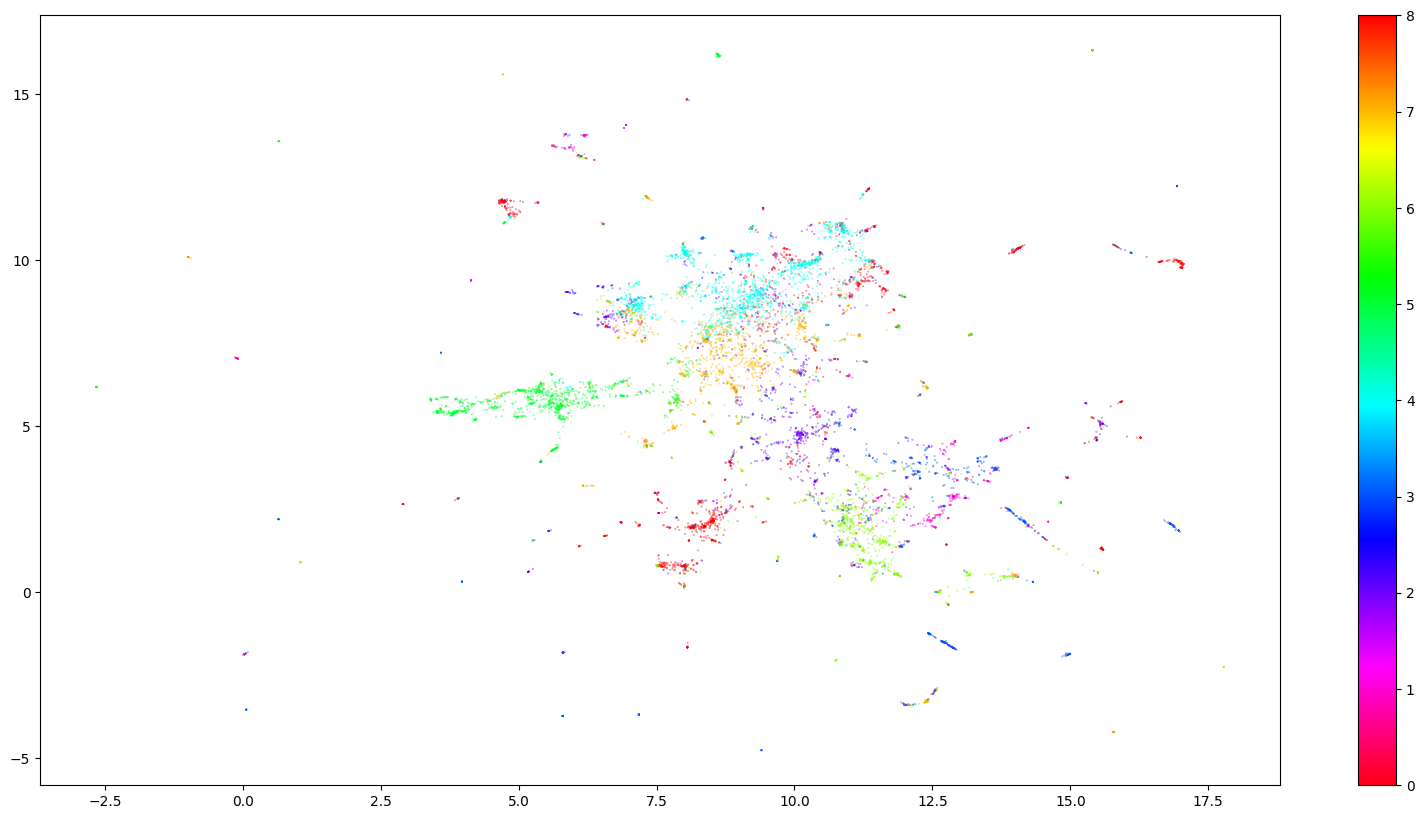

In [12]:
plot_clusters(word_wizard)

In [13]:
word_wizard.topic_modelling(column='paragraph', n_words=10)

/Users/quiquemz/.pyenv/versions/3.11.1/envs/capstone/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/quiquemz/.pyenv/versions/3.11.1/envs/capstone/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'u'] not in stop_words.
  warnings.warn(


In [14]:
word_wizard.df[['link', 'se_description', 'paragraph', 'title', 'cluster_topics']].to_csv('data/topic_modelling2.csv', index=False)

# Approach 2: 
## Using HDBScan
In this approach we do the clustering using HDBScan.

In [21]:
word_wizard = WordWizard(df)
word_wizard.create_sentence_embeddings(column='paragraph')

Batches: 100%|██████████| 321/321 [00:48<00:00,  6.59it/s]


In [30]:
word_wizard.cluster_embeddings(column='paragraph', algorithm='hdbscan')

In [23]:
word_wizard.df.head(1)

,paragraph_index,engine,link,se_description,se_source,n3k_author,n3k_published,paragraph,title,body,sentences,paragraph_sentence_embeddings,paragraph_reduced_dimensions_word_embeddings,paragraph_sentence_embeddings_clusters
0,0,Google,https://interestingengineering.com/science/a-n...,"In a groundbreaking study, scientists have dem...",Interesting Engineering,['Tejasri Gururaj'],2023-06-11 08:06:58+00:00,Both experiments were conducted at exceedingly...,Splitting phonons or sound for new type of qua...,Both experiments were conducted at exceedingly...,[Both experiments were conducted at exceedingl...,"[-0.09927327185869217, -0.038048699498176575, ...","[5.150224208831787, -6.842792987823486]",66


In [24]:
word_wizard.df['paragraph_sentence_embeddings_clusters'].value_counts()

-1      2346
 424     154
 323     123
 399     104
 316      93
        ... 
 145       5
 315       5
 319       5
 182       5
 444       5
Name: paragraph_sentence_embeddings_clusters, Length: 464, dtype: int64

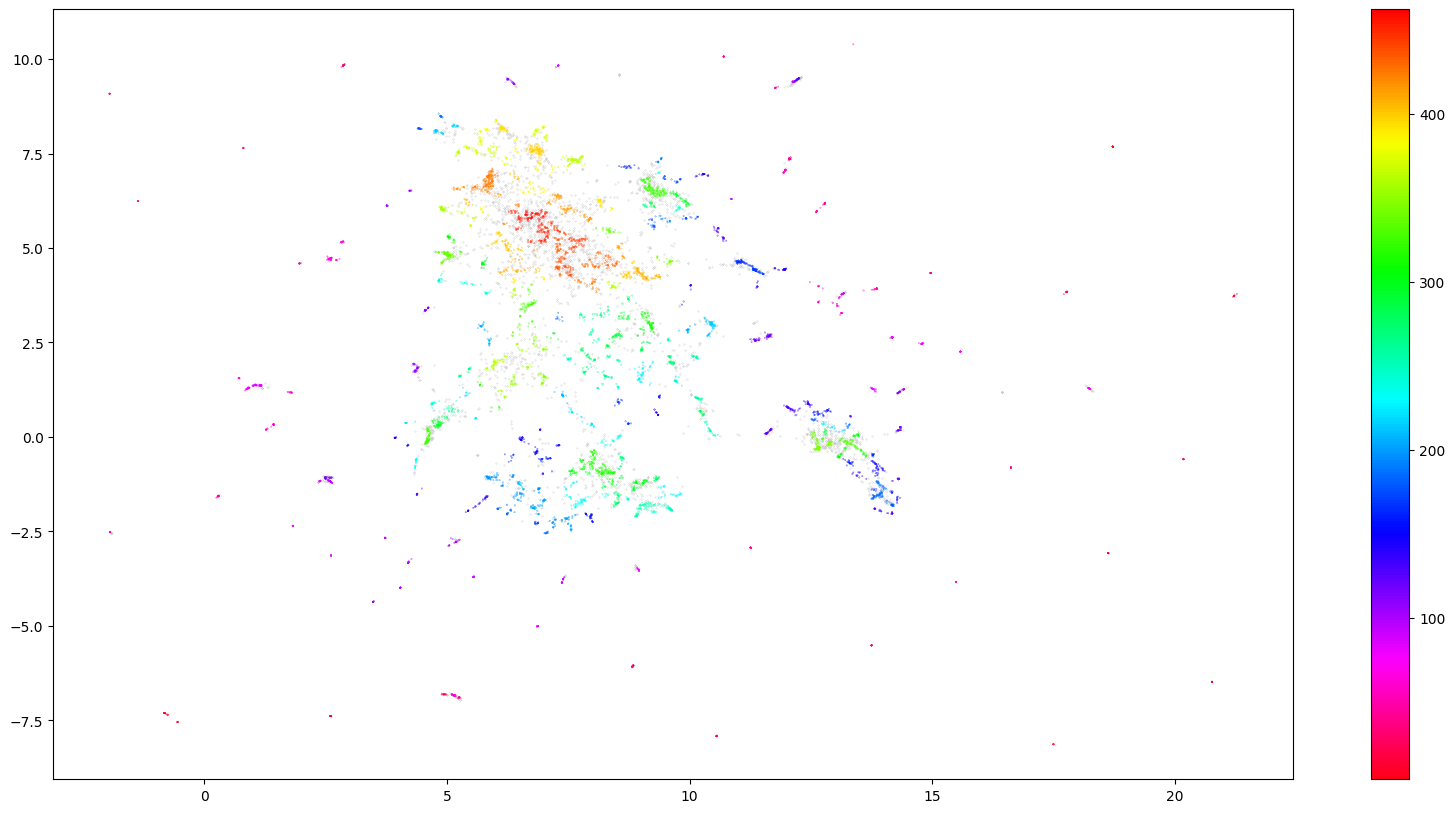

In [25]:
plot_clusters(word_wizard)

In [26]:
word_wizard.topic_modelling(column='paragraph', n_words=10)

/Users/quiquemz/.pyenv/versions/3.11.1/envs/capstone/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/quiquemz/.pyenv/versions/3.11.1/envs/capstone/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'u'] not in stop_words.
  warnings.warn(


In [27]:
word_wizard.df[['link', 'se_description', 'paragraph', 'title', 'cluster_topics']].to_csv('data/topic_modelling3.csv', index=False)

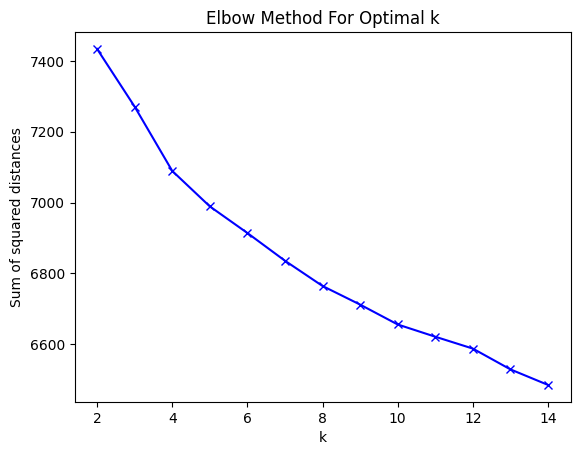

In [28]:
word_wizard.cluster_embeddings(column='paragraph', method='elbow')

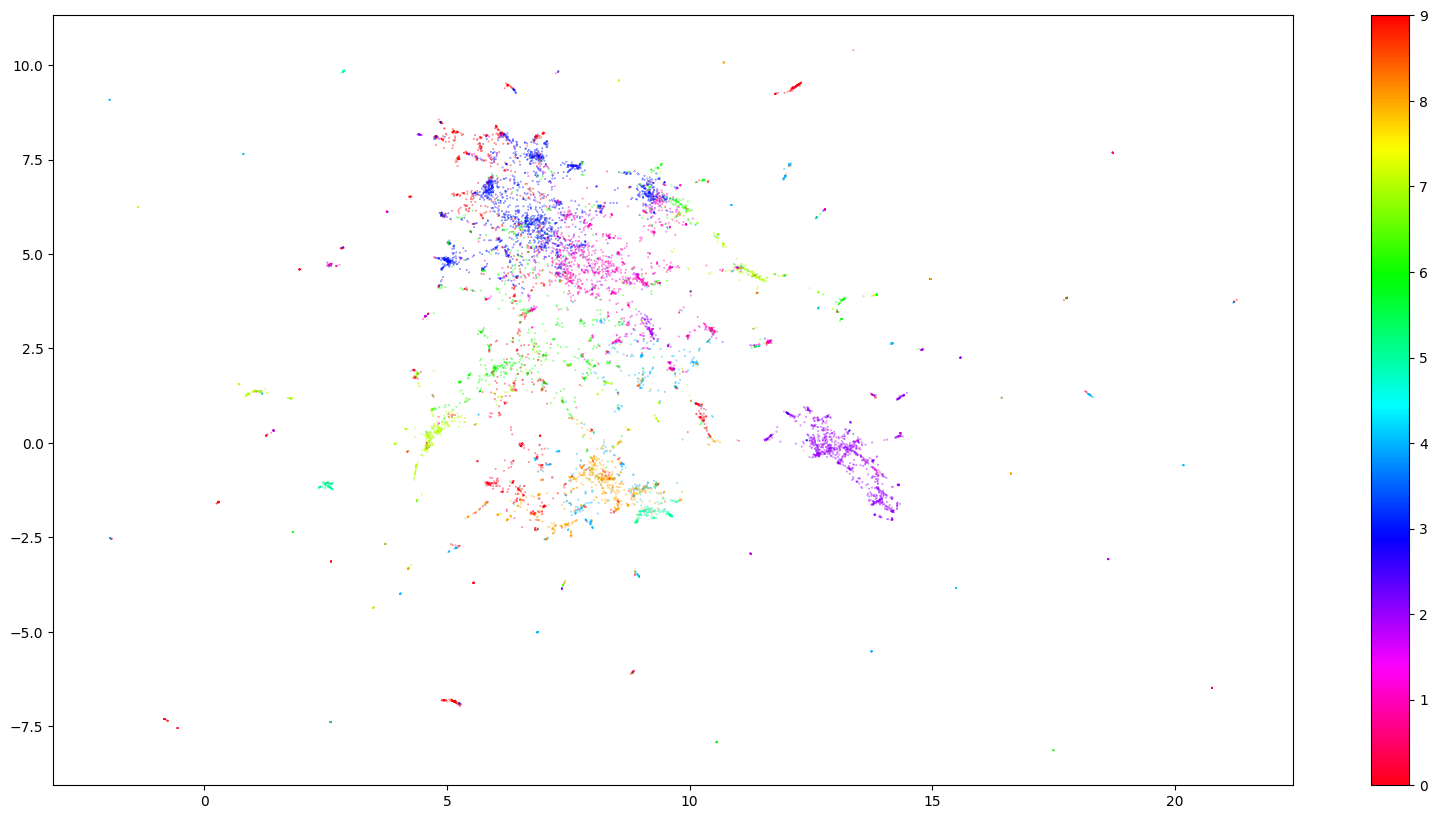

In [29]:
plot_clusters(word_wizard)